# xray tutorial

[Stephan Hoyer](http://stephanhoyer.com), Unidata Users Workshop, 2015

-------------

This notebook introduces xray for new users.

For more information about xray:

- Reading the online documentation: http://xray.readthedocs.org/
- Check us out on GitHub: http://github.com/xray/xray/

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xray

%matplotlib inline

np.set_printoptions(precision=3, linewidth=100, edgeitems=2)  # make numpy less verbose

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


-------------------

## xray basics

#### Reading and writing netCDF

To start off, download this [example netCDF file](https://github.com/xray/xray-data/blob/master/ncep_temperature_north-america_2013-14.nc?raw=true) subset from the [NCEP/NCAR Reanalysis 1](http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html).

We'll open it up using `xray.open_dataset`. Under the covers, this uses the [netCDF4-Python](https://github.com/unidata/netcdf4-python) library:

In [2]:
ds = xray.open_dataset('https://github.com/pydata/xarray-data/raw/master/air_temperature.nc')

ValueError: netCDF4 or pydap is required for accessing remote datasets via OPeNDAP

In [3]:
ds

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 241.2 242.5 243.5 244.0 244.1 243.9 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html

In [4]:
ds.air

<xray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision: 2
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Air temperature
    dataset: NMC Reanalysis
    level_desc: Surface
    statistic: Individual Obs
    parent_stat: Other
    actual_range: [ 185.16  322.1 ]

#### `xray.Dataset` is like a Python dictionary (of `xray.DataArray` objects)

In [5]:
'air' in ds

True

In [6]:
ds.keys()

[u'lat', u'air', u'lon', u'time']

In [7]:
ds.air

<xray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision: 2
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Air temperature
    dataset: NMC Reanalysis
    level_desc: Surface
    statistic: Individual Obs
    parent_stat: Other
    actual_range: [ 185.16  322.1 ]

In [8]:
ds.dims

Frozen(SortedKeysDict({u'lat': 25, u'lon': 53, u'time': 2920}))

In [9]:
ds.attrs

OrderedDict([(u'Conventions', u'COARDS'), (u'title', u'4x daily NMC reanalysis (1948)'), (u'description', u'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'), (u'platform', u'Model'), (u'references', u'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html')])

In [10]:
ds.attrs['foo'] = 'bar'

In [11]:
ds

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 241.2 242.5 243.5 244.0 244.1 243.9 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    foo: bar

In [12]:
ds.air.values

array([[[ 241.2 ,  242.5 , ...,  235.5 ,  238.6 ],
        [ 243.8 ,  244.5 , ...,  235.3 ,  239.3 ],
        ..., 
        [ 295.9 ,  296.2 , ...,  295.9 ,  295.2 ],
        [ 296.29,  296.79, ...,  296.79,  296.6 ]],

       [[ 242.1 ,  242.7 , ...,  233.6 ,  235.8 ],
        [ 243.6 ,  244.1 , ...,  232.5 ,  235.7 ],
        ..., 
        [ 296.2 ,  296.7 , ...,  295.5 ,  295.1 ],
        [ 296.29,  297.2 , ...,  296.4 ,  296.6 ]],

       ..., 
       [[ 245.79,  244.79, ...,  243.99,  244.79],
        [ 249.89,  249.29, ...,  242.49,  244.29],
        ..., 
        [ 296.29,  297.19, ...,  295.09,  294.39],
        [ 297.79,  298.39, ...,  295.49,  295.19]],

       [[ 245.09,  244.29, ...,  241.49,  241.79],
        [ 249.89,  249.29, ...,  240.29,  241.69],
        ..., 
        [ 296.09,  296.89, ...,  295.69,  295.19],
        [ 297.69,  298.09, ...,  296.19,  295.69]]])

In [13]:
ds.air.dims

(u'time', u'lat', u'lon')

In [14]:
ds.air.shape

(2920, 25, 53)

In [15]:
ds.air.attrs

OrderedDict([(u'long_name', u'4xDaily Air temperature at sigma level 995'), (u'units', u'degK'), (u'precision', 2), (u'GRIB_id', 11), (u'GRIB_name', u'TMP'), (u'var_desc', u'Air temperature'), (u'dataset', u'NMC Reanalysis'), (u'level_desc', u'Surface'), (u'statistic', u'Individual Obs'), (u'parent_stat', u'Other'), (u'actual_range', array([ 185.16,  322.1 ], dtype=float32))])

#### Saving back to netCDF

In [19]:
ds.to_netcdf('another-copy.nc')

In [21]:
! ncdump -h another-copy.nc

netcdf another-copy {
dimensions:
	lat = 25 ;
	time = 2920 ;
	lon = 53 ;
variables:
	float lat(lat) ;
		string lat:standard_name = "latitude" ;
		string lat:long_name = "Latitude" ;
		string lat:units = "degrees_north" ;
		string lat:axis = "Y" ;
	double time(time) ;
		string time:standard_name = "time" ;
		string time:long_name = "Time" ;
		string time:units = "hours since 1800-01-01" ;
		string time:calendar = "standard" ;
	float lon(lon) ;
		string lon:standard_name = "longitude" ;
		string lon:long_name = "Longitude" ;
		string lon:units = "degrees_east" ;
		string lon:axis = "X" ;
	ushort air(time, lat, lon) ;
		string air:long_name = "4xDaily Air temperature at sigma level 995" ;
		string air:units = "degK" ;
		air:precision = 2s ;
		air:GRIB_id = 11s ;
		string air:GRIB_name = "TMP" ;
		string air:var_desc = "Air temperature" ;
		string air:dataset = "NMC Reanalysis" ;
		string air:level_desc = "Surface" ;
		string air:statistic = "Individual Obs" ;
		string air:parent_stat = "O

### Indexing

#### By integer position

In [28]:
ds.air[-1]

<xray.DataArray 'air' (lat: 25, lon: 53)>
array([[ 245.09,  244.29, ...,  241.49,  241.79],
       [ 249.89,  249.29, ...,  240.29,  241.69],
       ..., 
       [ 296.09,  296.89, ...,  295.69,  295.19],
       [ 297.69,  298.09, ...,  296.19,  295.69]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
    time     datetime64[ns] 2014-12-31T18:00:00
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision: 2
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Air temperature
    dataset: NMC Reanalysis
    level_desc: Surface
    statistic: Individual Obs
    parent_stat: Other
    actual_range: [ 185.16  322.1 ]

#### By label along an axis (like pandas)

In [32]:
ds.air.loc['2013-01-01T00', :, 200]

<xray.DataArray 'air' (lat: 25)>
array([ 241.2 ,  243.8 ,  250.  ,  266.5 ,  274.5 ,  272.1 ,  273.7 ,  274.79,  275.9 ,  276.7 ,
        277.29,  278.4 ,  280.  ,  282.79,  284.6 ,  286.5 ,  287.9 ,  290.2 ,  293.1 ,  293.79,
        295.4 ,  297.  ,  296.6 ,  295.9 ,  296.29])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
    lon      float32 200.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision: 2
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Air temperature
    dataset: NMC Reanalysis
    level_desc: Surface
    statistic: Individual Obs
    parent_stat: Other
    actual_range: [ 185.16  322.1 ]

#### With named dimensions

In [31]:
ds.air.sel(time='2013')

<xray.DataArray 'air' (time: 1460, lat: 25, lon: 53)>
array([[[ 241.2 ,  242.5 , ...,  235.5 ,  238.6 ],
        [ 243.8 ,  244.5 , ...,  235.3 ,  239.3 ],
        ..., 
        [ 295.9 ,  296.2 , ...,  295.9 ,  295.2 ],
        [ 296.29,  296.79, ...,  296.79,  296.6 ]],

       [[ 242.1 ,  242.7 , ...,  233.6 ,  235.8 ],
        [ 243.6 ,  244.1 , ...,  232.5 ,  235.7 ],
        ..., 
        [ 296.2 ,  296.7 , ...,  295.5 ,  295.1 ],
        [ 296.29,  297.2 , ...,  296.4 ,  296.6 ]],

       ..., 
       [[ 251.7 ,  251.3 , ...,  239.7 ,  241.  ],
        [ 251.8 ,  252.8 , ...,  240.39,  244.1 ],
        ..., 
        [ 297.  ,  296.6 , ...,  294.6 ,  293.79],
        [ 297.4 ,  297.4 , ...,  295.  ,  294.4 ]],

       [[ 251.89,  251.2 , ...,  239.89,  240.7 ],
        [ 252.3 ,  253.  , ...,  239.5 ,  242.89],
        ..., 
        [ 297.1 ,  296.79, ...,  295.1 ,  294.5 ],
        [ 297.29,  297.7 , ...,  295.1 ,  294.7 ]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.

In [34]:
ds.air.sel(lat=slice(60, 50)).sel(lon=[260, 271, 280], method='nearest')

<xray.DataArray 'air' (time: 2920, lat: 5, lon: 3)>
array([[[ 247.7 ,  246.8 ,  253.39],
        [ 251.89,  249.5 ,  253.1 ],
        ..., 
        [ 253.3 ,  249.39,  256.6 ],
        [ 254.6 ,  252.3 ,  260.  ]],

       [[ 246.  ,  246.8 ,  251.  ],
        [ 248.8 ,  248.89,  251.2 ],
        ..., 
        [ 254.6 ,  251.8 ,  252.89],
        [ 252.89,  252.1 ,  252.3 ]],

       ..., 
       [[ 259.99,  256.19,  251.69],
        [ 259.99,  257.19,  251.79],
        ..., 
        [ 261.19,  254.19,  250.79],
        [ 260.39,  254.59,  250.49]],

       [[ 255.49,  255.19,  253.09],
        [ 260.19,  259.49,  252.69],
        ..., 
        [ 262.39,  257.39,  256.39],
        [ 261.49,  258.69,  258.89]]])
Coordinates:
  * lat      (lat) float32 60.0 57.5 55.0 52.5 50.0
  * lon      (lon) float32 260.0 270.0 280.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision

## Computation

You can do arithmetic directly on `Dataset` and `DataArray` objects. Labels are preserved, although attributes removed.

In [35]:
2 * ds

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 482.4 485.0 487.0 488.0 488.2 487.8 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    foo: bar

You can also apply NumPy "universal functions" like `np.sqrt` to `DataArray` objects:

In [36]:
np.sqrt(ds.air)

<xray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ 15.531,  15.572, ...,  15.346,  15.447],
        [ 15.614,  15.636, ...,  15.339,  15.469],
        ..., 
        [ 17.202,  17.21 , ...,  17.202,  17.181],
        [ 17.213,  17.228, ...,  17.228,  17.222]],

       [[ 15.56 ,  15.579, ...,  15.284,  15.356],
        [ 15.608,  15.624, ...,  15.248,  15.353],
        ..., 
        [ 17.21 ,  17.225, ...,  17.19 ,  17.178],
        [ 17.213,  17.239, ...,  17.216,  17.222]],

       ..., 
       [[ 15.678,  15.646, ...,  15.62 ,  15.646],
        [ 15.808,  15.789, ...,  15.572,  15.63 ],
        ..., 
        [ 17.213,  17.239, ...,  17.178,  17.158],
        [ 17.257,  17.274, ...,  17.19 ,  17.181]],

       [[ 15.655,  15.63 , ...,  15.54 ,  15.55 ],
        [ 15.808,  15.789, ...,  15.501,  15.546],
        ..., 
        [ 17.207,  17.23 , ...,  17.196,  17.181],
        [ 17.254,  17.265, ...,  17.21 ,  17.196]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.

In [38]:
ds.apply(np.sqrt)

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 15.53 15.57 15.6 15.62 15.62 15.62 ...

xray also implements standard aggregation functions:

In [39]:
ds.max()

<xray.Dataset>
Dimensions:  ()
Coordinates:
    *empty*
Data variables:
    air      float64 317.4

In [40]:
ds.mean(dim='time')

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
Data variables:
    air      (lat, lon) float64 260.4 260.2 259.9 259.5 259.0 258.6 258.2 ...

In [41]:
ds.median(dim=['lat', 'lon'])

<xray.Dataset>
Dimensions:  (time: 2920)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time) float64 277.5 276.7 276.2 276.8 277.0 275.3 275.6 275.4 ...

## Exercise

(a) Calculate the maximum air surface temperature over time in the vicinity of Boulder, CO (latitude=40, longitude=255)

In [45]:
ds.sel(lat=40, lon=255).max('time')

<xray.Dataset>
Dimensions:  ()
Coordinates:
    *empty*
Data variables:
    air      float64 302.8

(b) Convert the dataset from Kelvin to degrees Celsius and save to a new file. Don't forget to fix the temperature units! Recall `degC = degK - 273`.

In [47]:
(ds - 273).to_netcdf('in-celsius.nc')

----------------------

## Converting to pandas

[Pandas](http://pandas.pydata.org) is the best way to work with tabular data in Python. It's also a highly flexible data analysis tool, with way more functionality than xray.

The `pandas.DataFrame` is the work-horse pandas object, on which the `xray.Dataset` was based. The `pandas.Series` corresponds to the `xray.DataArray`

In [49]:
ds.to_dataframe().head()

air
lat lon time                       
75  200 2013-01-01 00:00:00  241.20
        2013-01-01 06:00:00  242.10
        2013-01-01 12:00:00  242.30
        2013-01-01 18:00:00  241.89
        2013-01-02 00:00:00  243.20

Pandas provides very robust tools for reading and writing CSV:

In [38]:
print ds.to_dataframe().head(10).to_csv()

lat,lon,time,air
75.0,200.0,2013-01-01 00:00:00,241.200012207
75.0,200.0,2013-01-01 06:00:00,242.100006104
75.0,200.0,2013-01-01 12:00:00,242.300018311
75.0,200.0,2013-01-01 18:00:00,241.899993896
75.0,200.0,2013-01-02 00:00:00,243.200012207
75.0,200.0,2013-01-02 06:00:00,244.100006104
75.0,200.0,2013-01-02 12:00:00,243.300018311
75.0,200.0,2013-01-02 18:00:00,243.800018311
75.0,200.0,2013-01-03 00:00:00,244.800018311
75.0,200.0,2013-01-03 06:00:00,243.899993896



Of course, it's just as easy to convert back from pandas:

In [50]:
df = pd.DataFrame({'x': [1, 2, 3], 'y': ['a', 'b', 'c']}).set_index('x')

In [51]:
df

,y
x,
1,a
2,b
3,c


In [52]:
xray.Dataset.from_dataframe(df)

<xray.Dataset>
Dimensions:  (x: 3)
Coordinates:
  * x        (x) int64 1 2 3
Data variables:
    y        (x) object 'a' 'b' 'c'

### Things you can do with pandas

Lots of method we haven't implemented in xray yet:

In [53]:
ds.to_dataframe().describe()

,air
count,3869000.000000
mean,281.255037
std,16.320412
min,221.000000
25%,272.200000
50%,285.200000
75%,294.600000
max,317.400000


In [54]:
ds.to_dataframe().sample(10)

,,,air
lat,lon,time,
72.5,242.5,2013-08-11 12:00:00,284.90
22.5,220.0,2014-05-16 00:00:00,293.29
47.5,257.5,2014-12-11 12:00:00,275.79
40.0,235.0,2013-05-09 00:00:00,286.90
27.5,237.5,2014-12-17 06:00:00,290.39
75.0,230.0,2013-09-09 00:00:00,268.50
52.5,220.0,2013-02-26 06:00:00,278.20
32.5,217.5,2014-06-17 06:00:00,292.70
55.0,222.5,2014-01-04 06:00:00,279.10


xray doesn't yet have plotting, so we export to pandas:

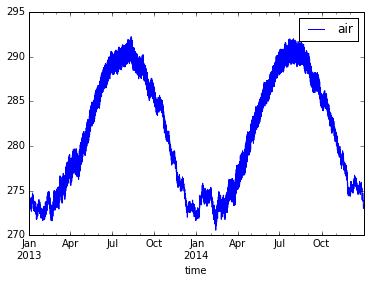

In [44]:
ds.mean(['lat', 'lon']).to_dataframe().plot()

We can also use matplotlib directly. This is useful for 2D plotting (not supported by pandas):

<matplotlib.colorbar.Colorbar instance at 0x113da2050>

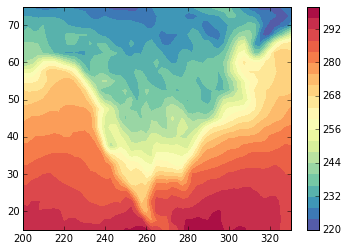

In [55]:
plt.contourf(ds.lon, ds.lat, ds.min('time').air, 20, cmap='Spectral_r')
plt.colorbar()

## Time series

Xray implements the "split-apply-combine" paradigm with `groupby`. This works really well for calculating climatologies:

In [56]:
ds.groupby('time.season').mean()

<xray.Dataset>
Dimensions:  (season: 4)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season) float64 273.6 289.2 279.0 283.0

In [57]:
clim = ds.groupby('time.month').mean('time')

In [58]:
clim

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, month: 12)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float64 246.3 246.4 246.2 245.8 245.2 244.6 ...

You can also do arithmetic with groupby objects, which repeats the arithmetic over each group:

In [59]:
anomalies = ds.groupby('time.month') - clim

In [60]:
anomalies

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
    month    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 -5.15 -3.886 -2.715 -1.812 -1.125 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    foo: bar

Resample adjusts a time series to a new resolution:

In [24]:
tmin = ds.air.resample('24H', dim='time', how='min')
tmax = ds.air.resample('24H', dim='time', how='max')

In [25]:
tmin.sel(time='2013-04-03T03:33', method='nearest')

<xray.DataArray 'air' (lat: 25, lon: 53)>
array([[ 249.6 ,  250.1 , ...,  243.5 ,  244.39],
       [ 250.39,  250.5 , ...,  245.3 ,  246.89],
       ..., 
       [ 295.4 ,  295.1 , ...,  294.6 ,  294.1 ],
       [ 296.  ,  296.29, ...,  295.1 ,  295.  ]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
    time     datetime64[ns] 2013-04-03
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision: 2
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Air temperature
    dataset: NMC Reanalysis
    level_desc: Surface
    statistic: Individual Obs
    parent_stat: Other
    actual_range: [ 185.16  322.1 ]

In [26]:
ds_extremes = xray.Dataset({'tmin': tmin, 'tmax': tmax})

In [27]:
ds_extremes

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 730)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 2013-01-03 ...
Data variables:
    tmax     (time, lat, lon) float64 242.3 242.7 243.5 244.0 244.1 243.9 ...
    tmin     (time, lat, lon) float64 241.2 241.8 241.8 242.1 242.6 243.3 ...

-------------------

## Exercises

(c) Calculate anomalies for `tmin`. Plot a 2D map of these anomalies for `2014-12-31`.

In [30]:
tmin_clim = tmin.groupby('time.month').mean('time')
tmin_anom = tmin.groupby('time.month') - tmin_clim

<matplotlib.colorbar.Colorbar instance at 0x110568c20>

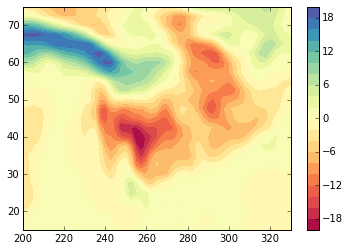

In [38]:
plt.contourf(ds.lon, ds.lat, tmin_anom.sel(time='2014-12-31'), 20, cmap='Spectral')
plt.colorbar()

(d) Resample the original dataset to a monthly average, average across space and plot the time-series. (Hint: resampling uses `'1MS'` to indicate month-start.)

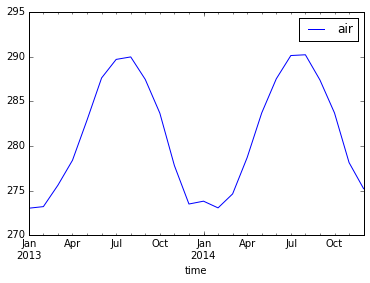

In [79]:
ds.resample('1MS', dim='time').mean(['lat', 'lon']).to_dataframe().plot()

-------------------

## xray does (fast) automatic alignment

What happens if you multiple an array with dimensions `(time, latitude, longitude)` with an array with dimensions `(time,)`?

In [94]:
ds - ds.mean(['lat', 'lon'])

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 -32.97 -31.67 -30.67 -30.17 -30.07 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    foo: bar

Unlike with NumPy arrays, it works! Dimension names are paired up; mismatched dimensions are looped over, like broadcasting in NumPy.

Similarly, notice that `.T` transposes an array:

In [97]:
ds.air.T.dims

(u'lon', u'lat', u'time')

We can subtract an array from its transpose:

In [96]:
ds.air - ds.air.T

<xray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       ..., 
       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...

Finally, note that xray also aligns based on coordinate labels; the result has the intersection of the argument labels:

In [100]:
ds.sel(time='2014')

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 1460)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * time     (time) datetime64[ns] 2014-01-01 2014-01-01T06:00:00 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
Data variables:
    air      (time, lat, lon) float64 252.3 251.2 250.0 248.8 247.5 246.3 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    foo: bar

In [116]:
ds.sel(lat=[60, 55]) - ds.sel(time='2014-01')

<xray.Dataset>
Dimensions:  (lat: 2, lon: 53, time: 124)
Coordinates:
  * lat      (lat) float64 60.0 55.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2014-01-01 2014-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html

## xray also works for data that doesn't fit in memory

Here's a quick demo of [how xray can leverage dask](http://xray.readthedocs.org/en/stable/dask.html) to work with data that doesn't fit in memory. This lets xray substitute for tools like `cdo` and `nco`.

Open a bunch of netCDF files from disk using `xray.open_mfdataset`:

In [84]:
ds = xray.open_mfdataset('/Users/shoyer/data/era-interim/2t/*.nc', engine='scipy')

In [85]:
ds

<xray.Dataset>
Dimensions:    (latitude: 256, longitude: 512, time: 52596)
Coordinates:
  * latitude   (latitude) float32 89.4628 88.767 88.067 87.3661 86.6648 ...
  * longitude  (longitude) float32 0.0 0.703125 1.40625 2.10938 2.8125 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-01-01T06:00:00 ...
Data variables:
    t2m        (time, latitude, longitude) float64 240.6 240.6 240.6 240.6 ...
Attributes:
    Conventions: CF-1.0
    history: 2015-01-24 09:20:12 GMT by grib_to_netcdf-1.12.3: grib_to_netcdf /data/data01/mars-web231-20150124092007-12207-11342.target -o /data/data01/mars-web231-20150124092011-12207-11343.nc

In [86]:
ds.t2m.data

dask.array<concatenate-3, shape=(52596, 256, 512), chunks=((124, 112, 124, ..., 120, 124), (128, 128), (512,)), dtype=float64>

In [151]:
ds.nbytes * (2 ** -30)

51.363675981760025

In [153]:
%time float(ds.t2m.mean())

CPU times: user 2min 43s, sys: 1min 10s, total: 3min 53s
Wall time: 1min


278.64617415292236

For more details, read this blog post: http://continuum.io/blog/xray-dask